In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('lstm_analysis.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (14,20,22,30,36,38,46,47,48,49,53,54,56,58,64,65,69,70,71,72,74,82,87,91,92,93,101,102) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
dis = data[data['dischargestatus']==0]

In [33]:
death = data[data['dischargestatus']==1]



In [34]:
death.uhid.unique()

array(['RNEH.0000012581', 'RSHI.0000014720', 'RSHI.0000015691',
       'RSHI.0000023451', 'RSHI.0000015178', 'RNEH.0000008375',
       'RNEH.0000011301', 'RSHI.0000012088', 'RSHI.0000017471',
       'RSHI.0000017472', 'RSHI.0000019707', 'RSHI.0000021953',
       'RSHI.0000015211', 'RNEH.0000013713', 'RSHI.0000016373'],
      dtype=object)

In [35]:
# death = death[(death['peep']>0) & (death['peep']<15)]
# dis = dis[(dis['peep']>0) & (dis['minvol']<10)]


In [36]:
#death = death.drop_duplicates(subset=['uhid','centraltemp'],keep='first')

In [37]:
#dis = dis.drop_duplicates(subset=['uhid','centraltemp'],keep='first')

In [38]:
# dis = dis[(dis['centraltemp']>30) & (dis['centraltemp']<40)]

In [39]:
death['tpn_per_kg'] = death['totalparenteralvolume']/(death['currentdateweight']*0.001)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
dis['tpn_per_kg'] = dis['totalparenteralvolume']/(dis['currentdateweight']*0.001)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array(['RNEH.0000012581', 'RSHI.0000014720', 'RSHI.0000015691',
       'RSHI.0000023451', 'RSHI.0000015178', 'RNEH.0000008375',
       'RNEH.0000011301', 'RSHI.0000012088', 'RSHI.0000017471',
       'RSHI.0000017472', 'RSHI.0000019707', 'RSHI.0000021953',
       'RSHI.0000015211', 'RNEH.0000013713', 'RSHI.0000016373'],
      dtype=object)

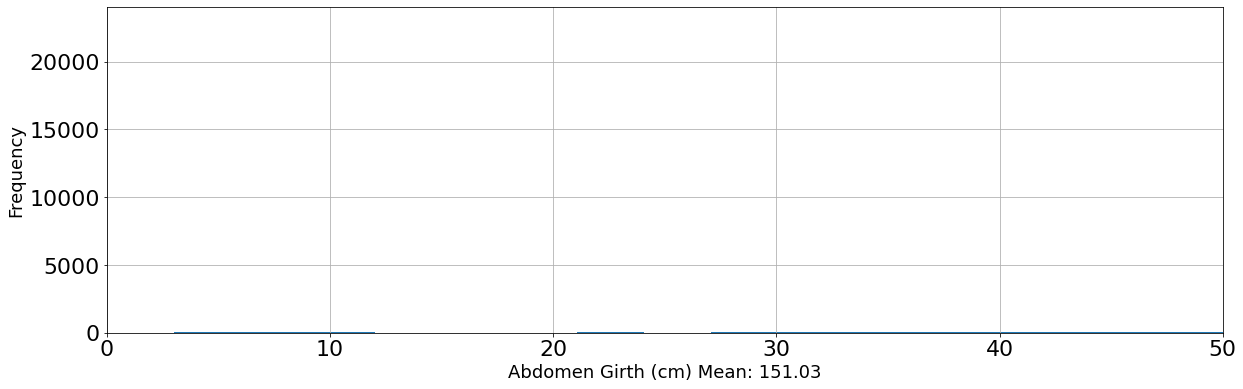

In [48]:

from pylab import rcParams
rcParams['figure.figsize'] = 20, 6
axes = plt.gca()
death['heartrate'].hist(bins=100)
plt.rcParams.update({'font.size': 22})
plt.xlabel('Abdomen Girth (cm)'+' Mean: '+str(round(np.nanmean(death['heartrate']),2)),fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.xlim(0,50)
#plt.savefig('Death_abd_8.png')
death.uhid.unique()

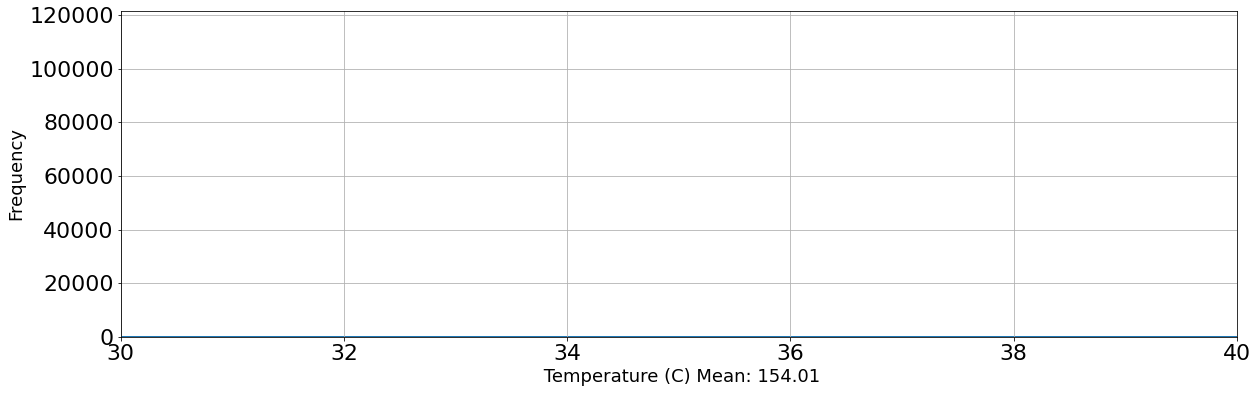

In [49]:
dis['heartrate'].hist()
plt.rcParams.update({'font.size': 22})
plt.xlabel(' Temperature (C)'+' Mean: '+str(round(np.nanmean(dis['heartrate']),2)),fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.xlim(30,40)
plt.savefig('Discharge_temp_9.png')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [ ]:
train = pd.read_csv('master_train.csv')
train.drop('Unnamed: 0',axis=1,inplace=True)
test = pd.read_csv('master_test.csv')
test.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
da = pd.concat([train,test])

In [ ]:
data.columns

In [ ]:
death = data[data['dischargestatus_x']=='Death']
dis = data[data['dischargestatus_x']=='Discharge']

In [ ]:
cols = ['uhid','abdomen_girth_y', 'urine',
       'totalparenteralvolume', 'ph_y','centraltemp', 'currentdateweight',
       'currentdateheight']

In [ ]:
death = death[cols]

In [ ]:
dis = dis[cols]

In [ ]:
death = death.replace(-999,np.nan)

In [ ]:
dis = dis.replace(-999,np.nan)

In [ ]:
di = dis.drop_duplicates(subset=['uhid','totalparenteralvolume'])

In [ ]:
di['tpn_per_kg'] = (di['totalparenteralvolume']/(di['currentdateweight']*0.001))

In [ ]:
de = death.drop_duplicates(subset=['uhid','totalparenteralvolume'])

In [ ]:
de['tpn_per_kg'] = (de['totalparenteralvolume']/(de['currentdateweight']*0.001))

NameError: name 'di' is not defined

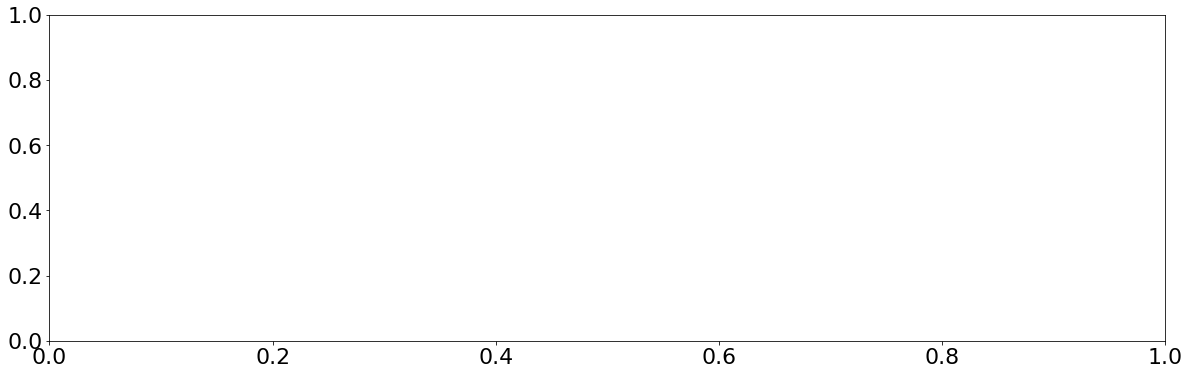

In [45]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 6
axes = plt.gca()
di['tpn_per_kg'].hist(bins=100)
plt.rcParams.update({'font.size': 22})
plt.xlim(0,100)
plt.xlabel(' TPN/Kg (cm)'+' Mean: '+str(round(np.nanmean(di['tpn_per_kg']),2)),fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.savefig('Discharge_tpn_5.png')

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 6
axes = plt.gca()
de['tpn_per_kg'].hist(bins=100)
plt.rcParams.update({'font.size': 22})
plt.xlim(0,100)
plt.xlabel('TPN/kg (ml/kg)'+' Mean: '+str(round(np.nanmean(de['tpn_per_kg']),2)),fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.savefig('Death_tpn_5.png')

In [ ]:
len(de)

In [ ]:
de['tpn_per_kg']

In [115]:
death['minvol'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: minvol, dtype: float64

In [114]:
dis['minvol'].describe()

count     65.000000
mean     174.830769
std       15.641061
min      151.000000
25%      161.000000
50%      175.000000
75%      190.000000
max      199.000000
Name: minvol, dtype: float64

In [32]:
death = death.drop_duplicates(subset=['uhid','weight_diff'],keep='first')

In [33]:
dis = dis.drop_duplicates(subset=['uhid','weight_diff'],keep='first')

In [44]:
death['weight_diff'].hist(bins=100)
plt.xlim(-300,300)
plt.rcParams.update({'font.size': 22})
plt.xlabel(' Weight Difference (kg)'+' Mean: '+str(round(np.nanmean(death['weight_diff']),2)),fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.savefig('weight_diff_death.png')

KeyError: 'weight_diff'

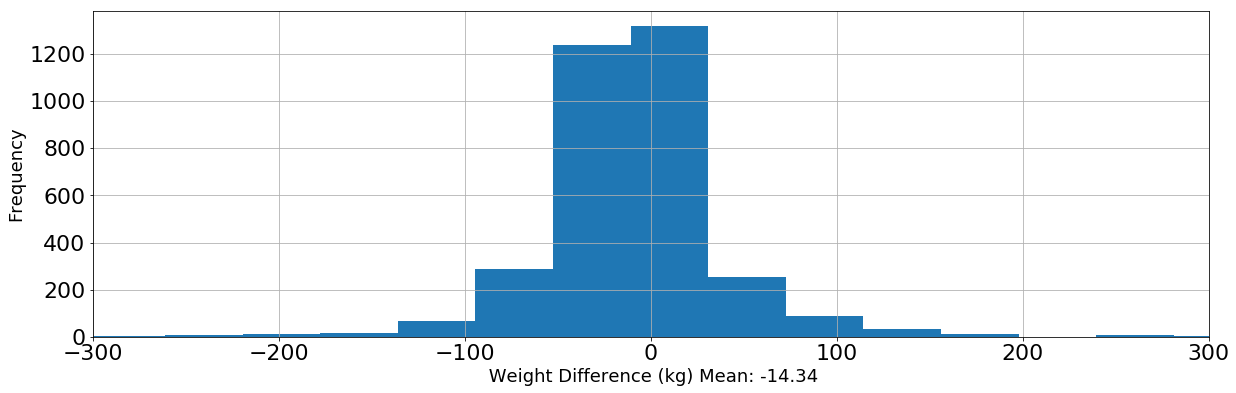

In [45]:
dis['weight_diff'].hist(bins=100)
plt.xlim(-300,300)
plt.xlabel(' Weight Difference (kg)'+' Mean: '+str(round(np.nanmean(dis['weight_diff']),2)),fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.savefig('weight_diff_discharge.png')


In [13]:
dis.centraltemp.unique()

array([  nan,  36.6,  36.5,  36.4,   3.6,  37.3,  36.3,  36.8,  36.7,
        35.6,  36.1, 365. ,  37.4,  99.5,  99.3,  98.8,  37. ,   6. ,
        35.5,  36.2,  36. ,   6.5,  35.4,  98.6])